In [1]:
# Introduction Concrete: https://en.wikipedia.org/wiki/Concrete
# cement: kg in a m3 mixture
# slag: kg in a m3 mixture
# flyash: kg in a m3 mixture
# water: kg in a m3 mixture
# superplasticzer: kg in a m3 mixture
# coarseaggregate kg in a m3 mixture
# fineaggregate: kg in a m3 mixture
# age: in days
# csMPa: compressive strength in MPa

%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import itertools
import seaborn

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV #
from sklearn.model_selection import cross_val_predict, train_test_split


In [3]:
dataSet = pd.read_csv("Concrete_Data_Yeh.csv")
print(dataSet.info())
# Rename the columns
dataSet.columns = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [4]:
dataSet.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
print(dataSet["strength"].min())
print(dataSet["strength"].max())

2.33
82.6


In [6]:
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
splast,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
print("Number of rows    :",dataSet.shape[0])
print("Number of columns :",dataSet.shape[1])

Number of rows    : 1030
Number of columns : 9


In [8]:
# ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']
from mpl_toolkits.mplot3d import Axes3D
dataSet_c = dataSet.copy()

print (dataSet_c)

      cement   slag    ash  water  splast  coarse   fine  age  strength
0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28     79.99
1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28     61.89
2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270     40.27
3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365     41.05
4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360     44.30
5      266.0  114.0    0.0  228.0     0.0   932.0  670.0   90     47.03
6      380.0   95.0    0.0  228.0     0.0   932.0  594.0  365     43.70
7      380.0   95.0    0.0  228.0     0.0   932.0  594.0   28     36.45
8      266.0  114.0    0.0  228.0     0.0   932.0  670.0   28     45.85
9      475.0    0.0    0.0  228.0     0.0   932.0  594.0   28     39.29
10     198.6  132.4    0.0  192.0     0.0   978.4  825.5   90     38.07
11     198.6  132.4    0.0  192.0     0.0   978.4  825.5   28     28.02
12     427.5   47.5    0.0  228.0     0.0   932.0  594.0  270   

In [9]:
# Prepare Datastructure for 3D visulization

# When we reset the index, the old index is added as a column, and a new sequential index is used
df = dataSet_c.unstack().reset_index()
print (df)

       level_0  level_1       0
0       cement        0  540.00
1       cement        1  540.00
2       cement        2  332.50
3       cement        3  332.50
4       cement        4  198.60
5       cement        5  266.00
6       cement        6  380.00
7       cement        7  380.00
8       cement        8  266.00
9       cement        9  475.00
10      cement       10  198.60
11      cement       11  198.60
12      cement       12  427.50
13      cement       13  190.00
14      cement       14  304.00
15      cement       15  380.00
16      cement       16  139.60
17      cement       17  342.00
18      cement       18  380.00
19      cement       19  475.00
20      cement       20  427.50
21      cement       21  139.60
22      cement       22  139.60
23      cement       23  139.60
24      cement       24  380.00
25      cement       25  380.00
26      cement       26  380.00
27      cement       27  342.00
28      cement       28  427.50
29      cement       29  475.00
...     

<IPython.core.display.Javascript object>


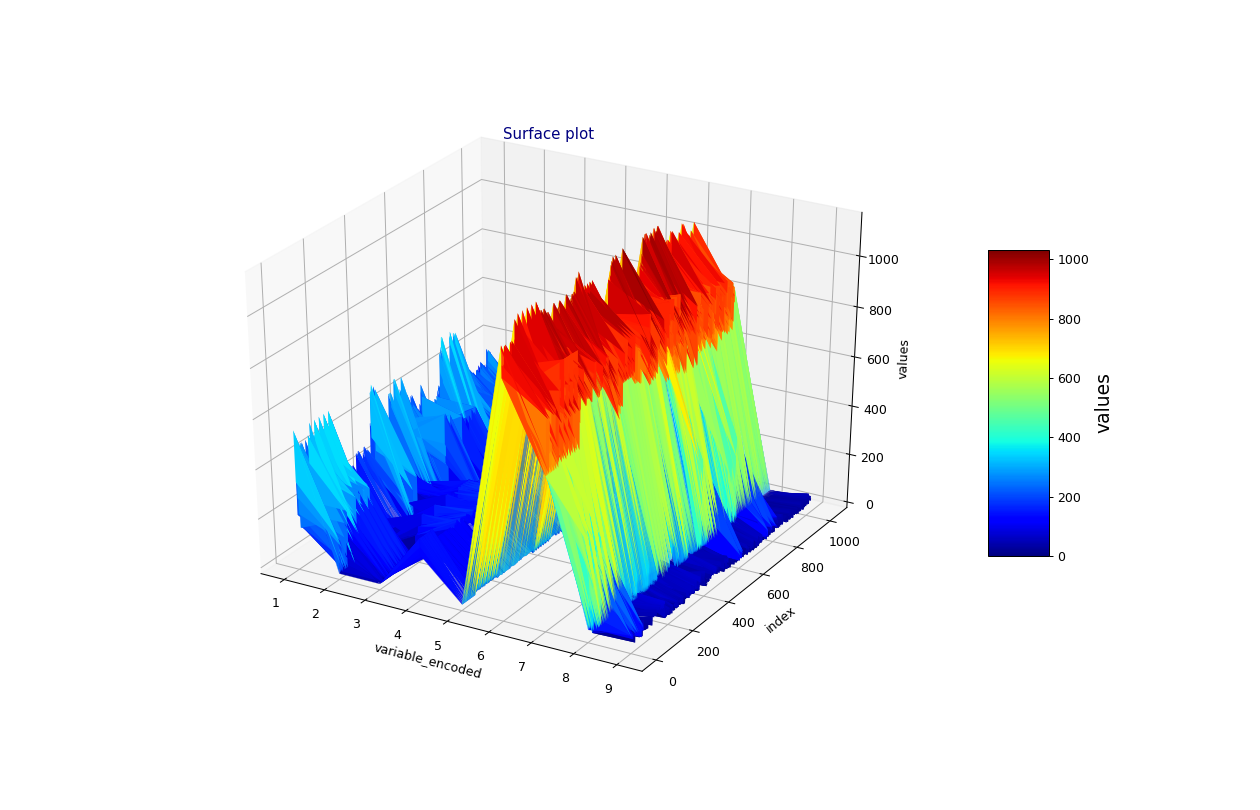

In [10]:
%matplotlib notebook 
# with interaction

df.columns = ["X","Y","Z"]
df["X"] = df["X"].map({'cement':1, 'slag':2, 'ash':3, 'water':4, 'splast':5, 'coarse':6, 
                       'fine':7, 'age':8, 'strength':9})
fig = plt.figure(figsize=(14,9))
ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=1)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

<IPython.core.display.Javascript object>


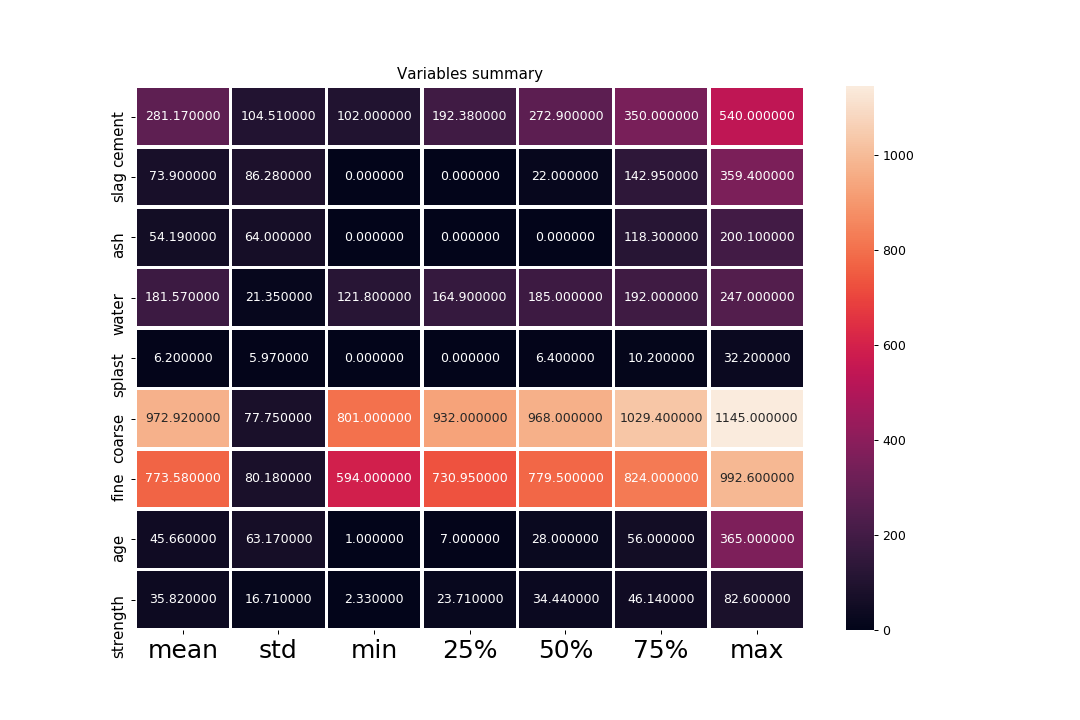

In [11]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(round(dataSet.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

<IPython.core.display.Javascript object>


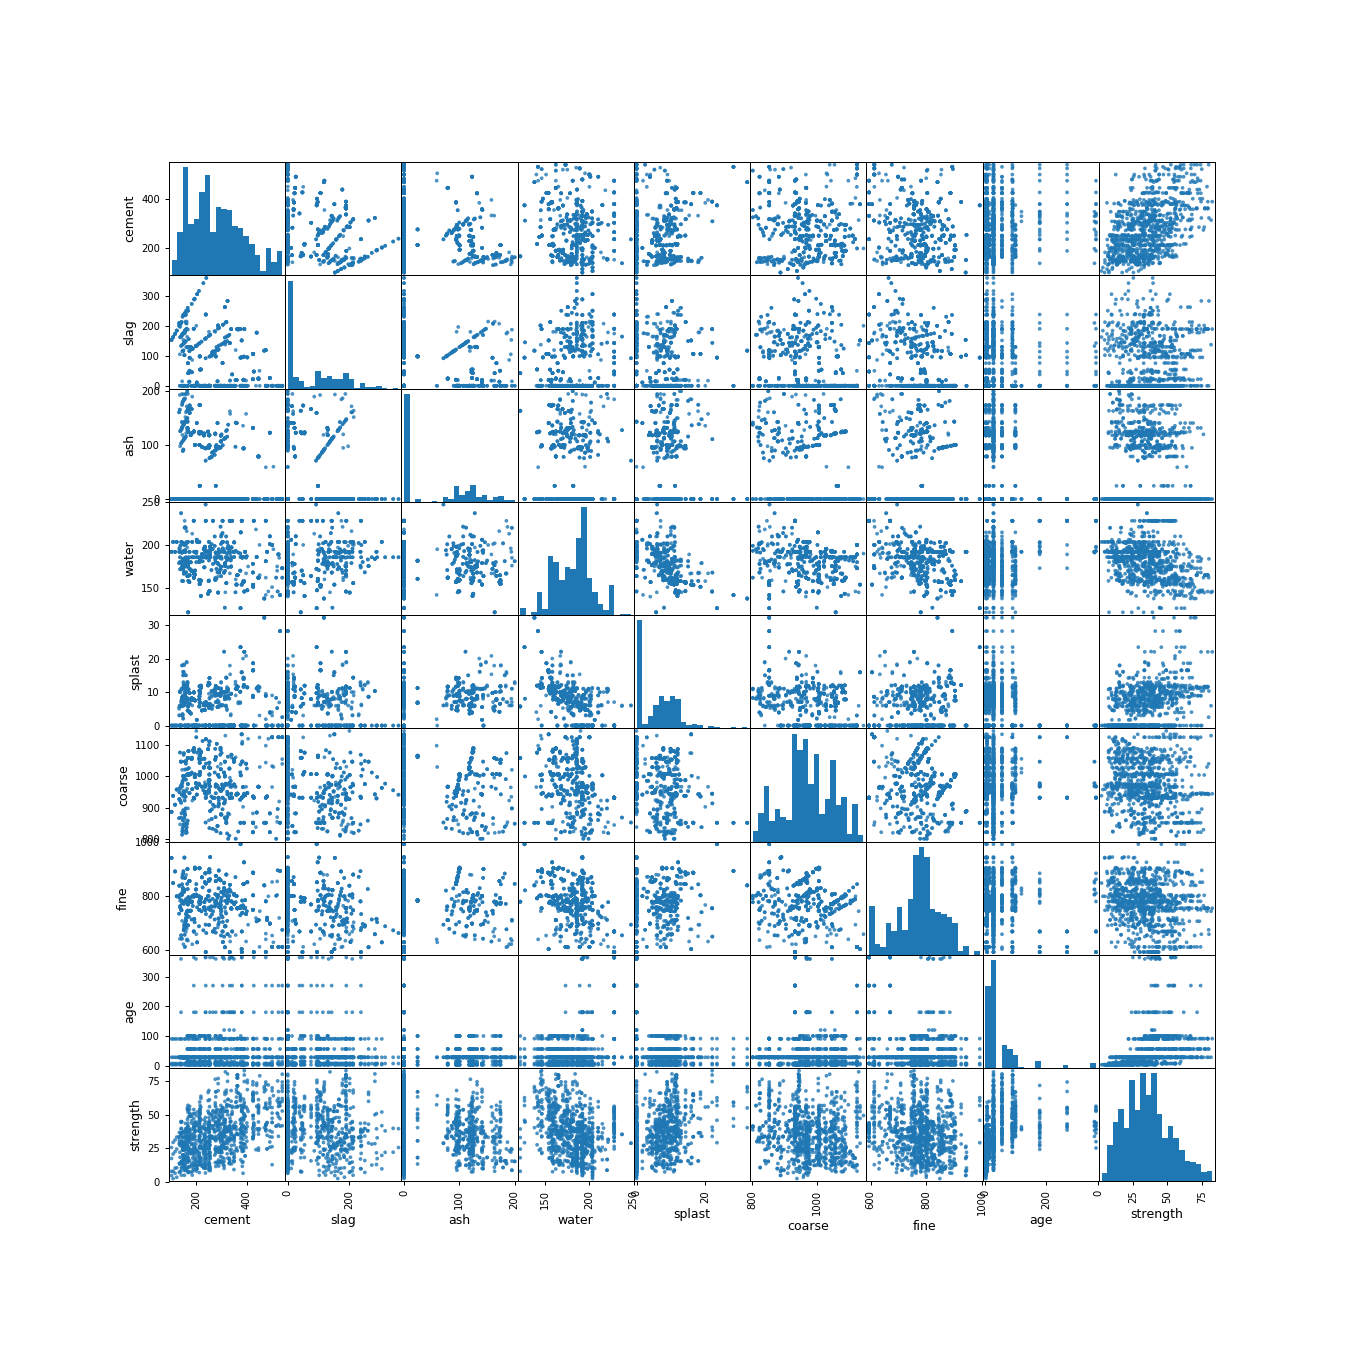

In [12]:
cols_feature = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
cols_target = [ 'strength']
grr = pd.plotting.scatter_matrix(dataSet
                                 #,diagonal='kde'
                                 ,figsize=(15, 15)
                                 ,marker ="."
                                 ,hist_kwds={'bins' : 20}
                              
                                 ,alpha = 0.8)
plt.show()

Ingredients Distribution

['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']


<IPython.core.display.Javascript object>


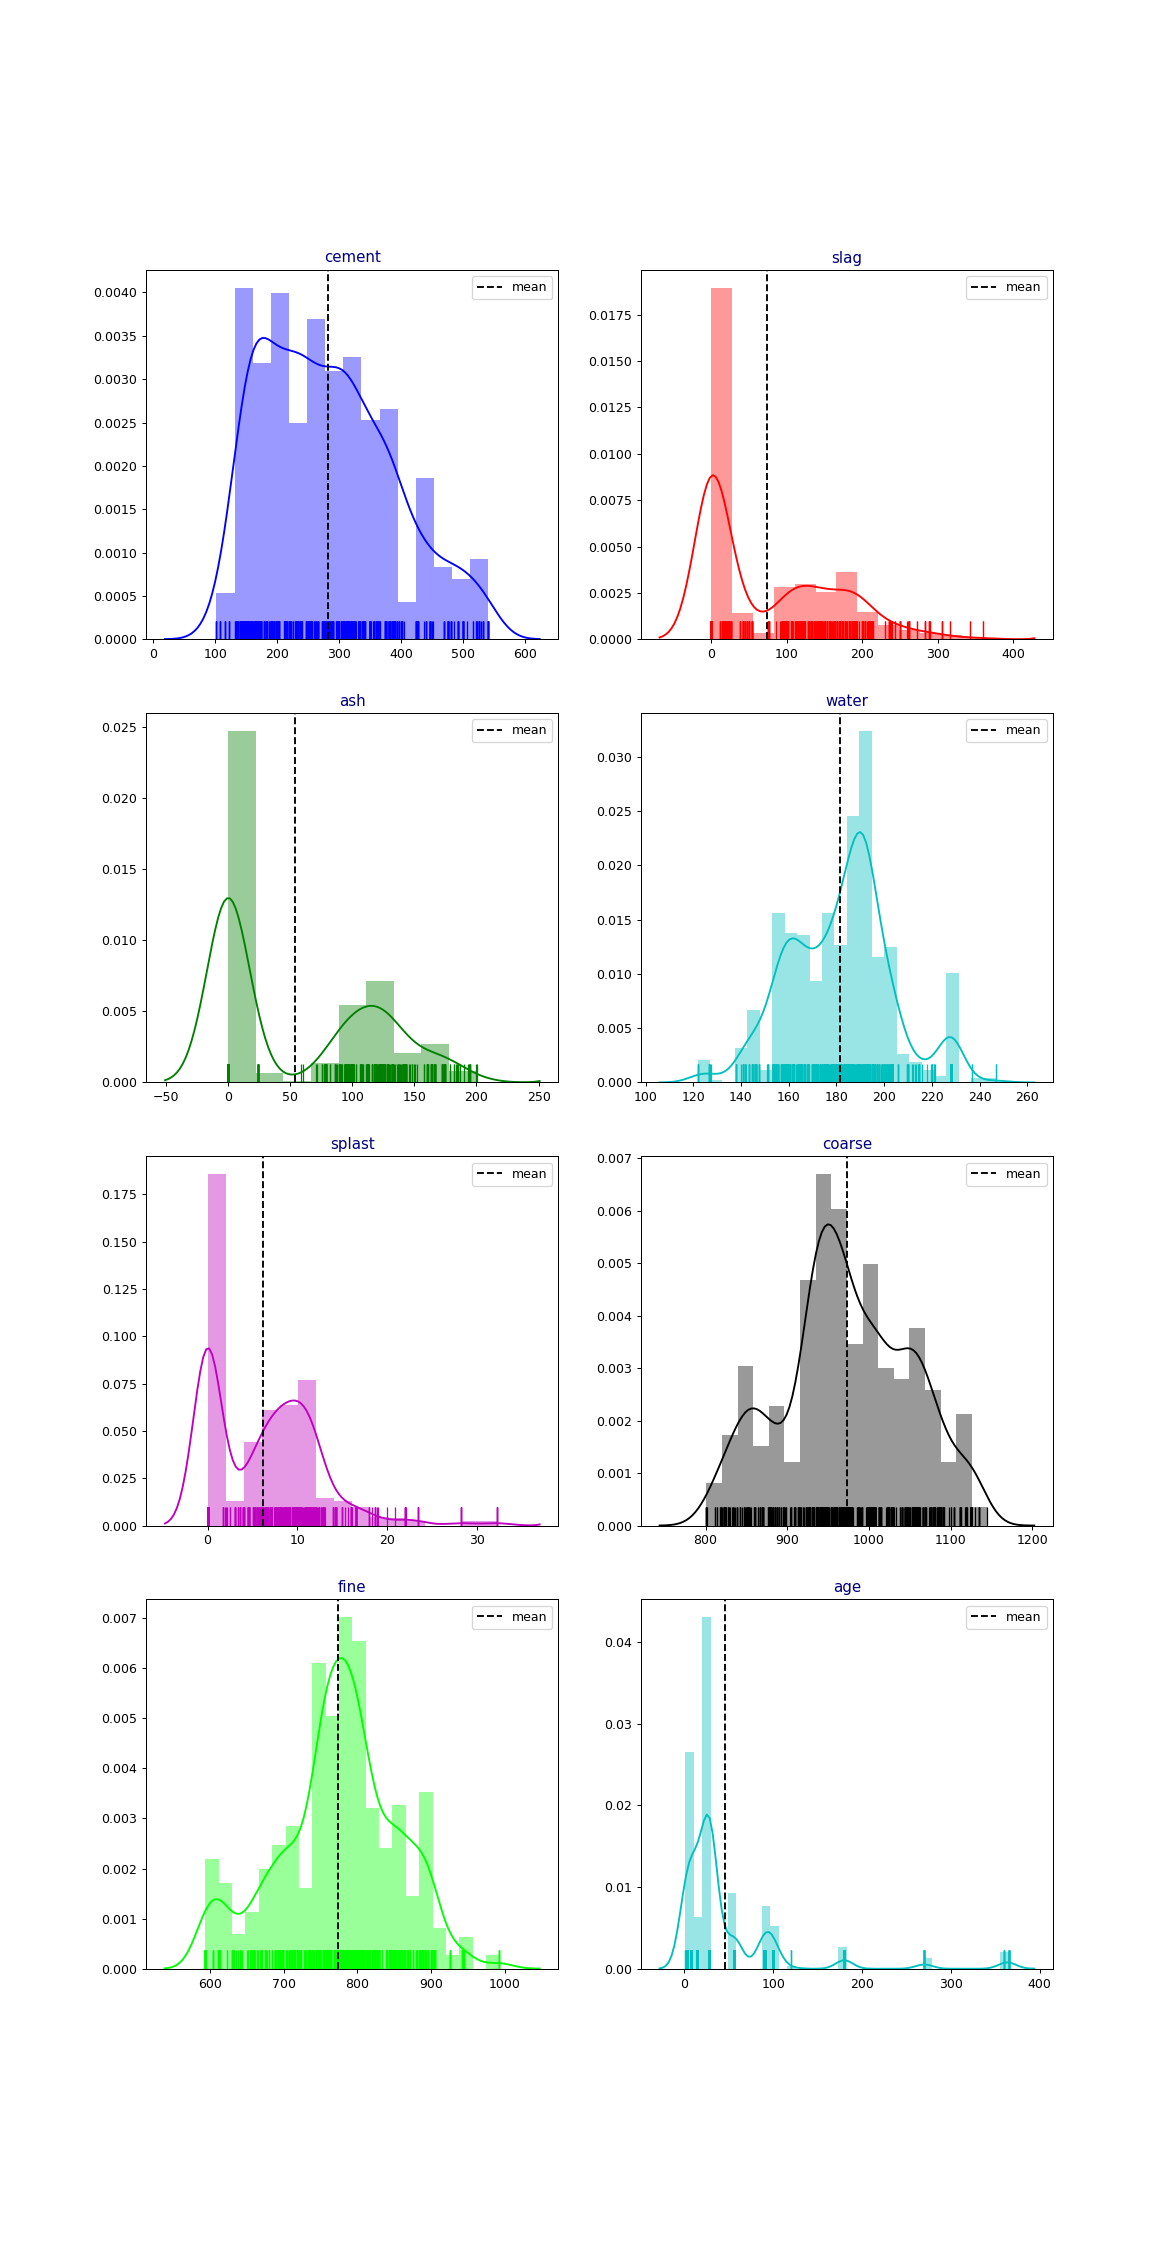

C:\Users\Meiling Shi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [13]:
cols = [i for i in dataSet.columns if i not in 'strength'] # all columns' names except strength
print (cols)
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"] #color for visualization
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs): # iterator
    plt.subplot(4,2,j + 1)
    ax = sns.distplot(dataSet[i],color=k,rug=True)# Flexibly plot a univariate distribution of observations.
    ax.set_facecolor("w")
    plt.axvline(dataSet[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

<IPython.core.display.Javascript object>


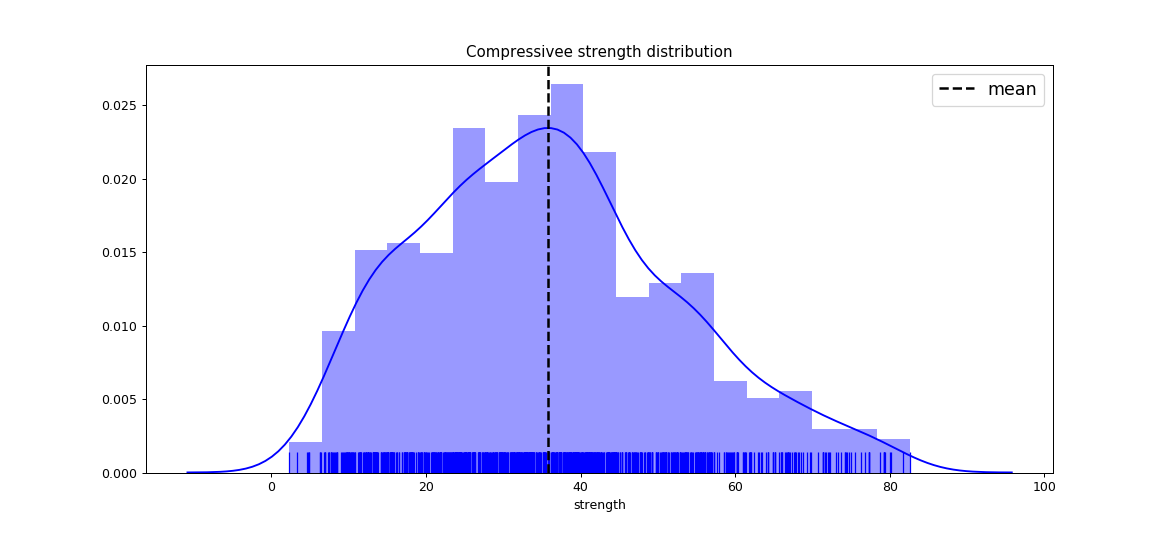

In [14]:
plt.figure(figsize=(13,6))
sns.distplot(dataSet["strength"],color="b",rug=True)
plt.axvline(dataSet["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

<IPython.core.display.Javascript object>


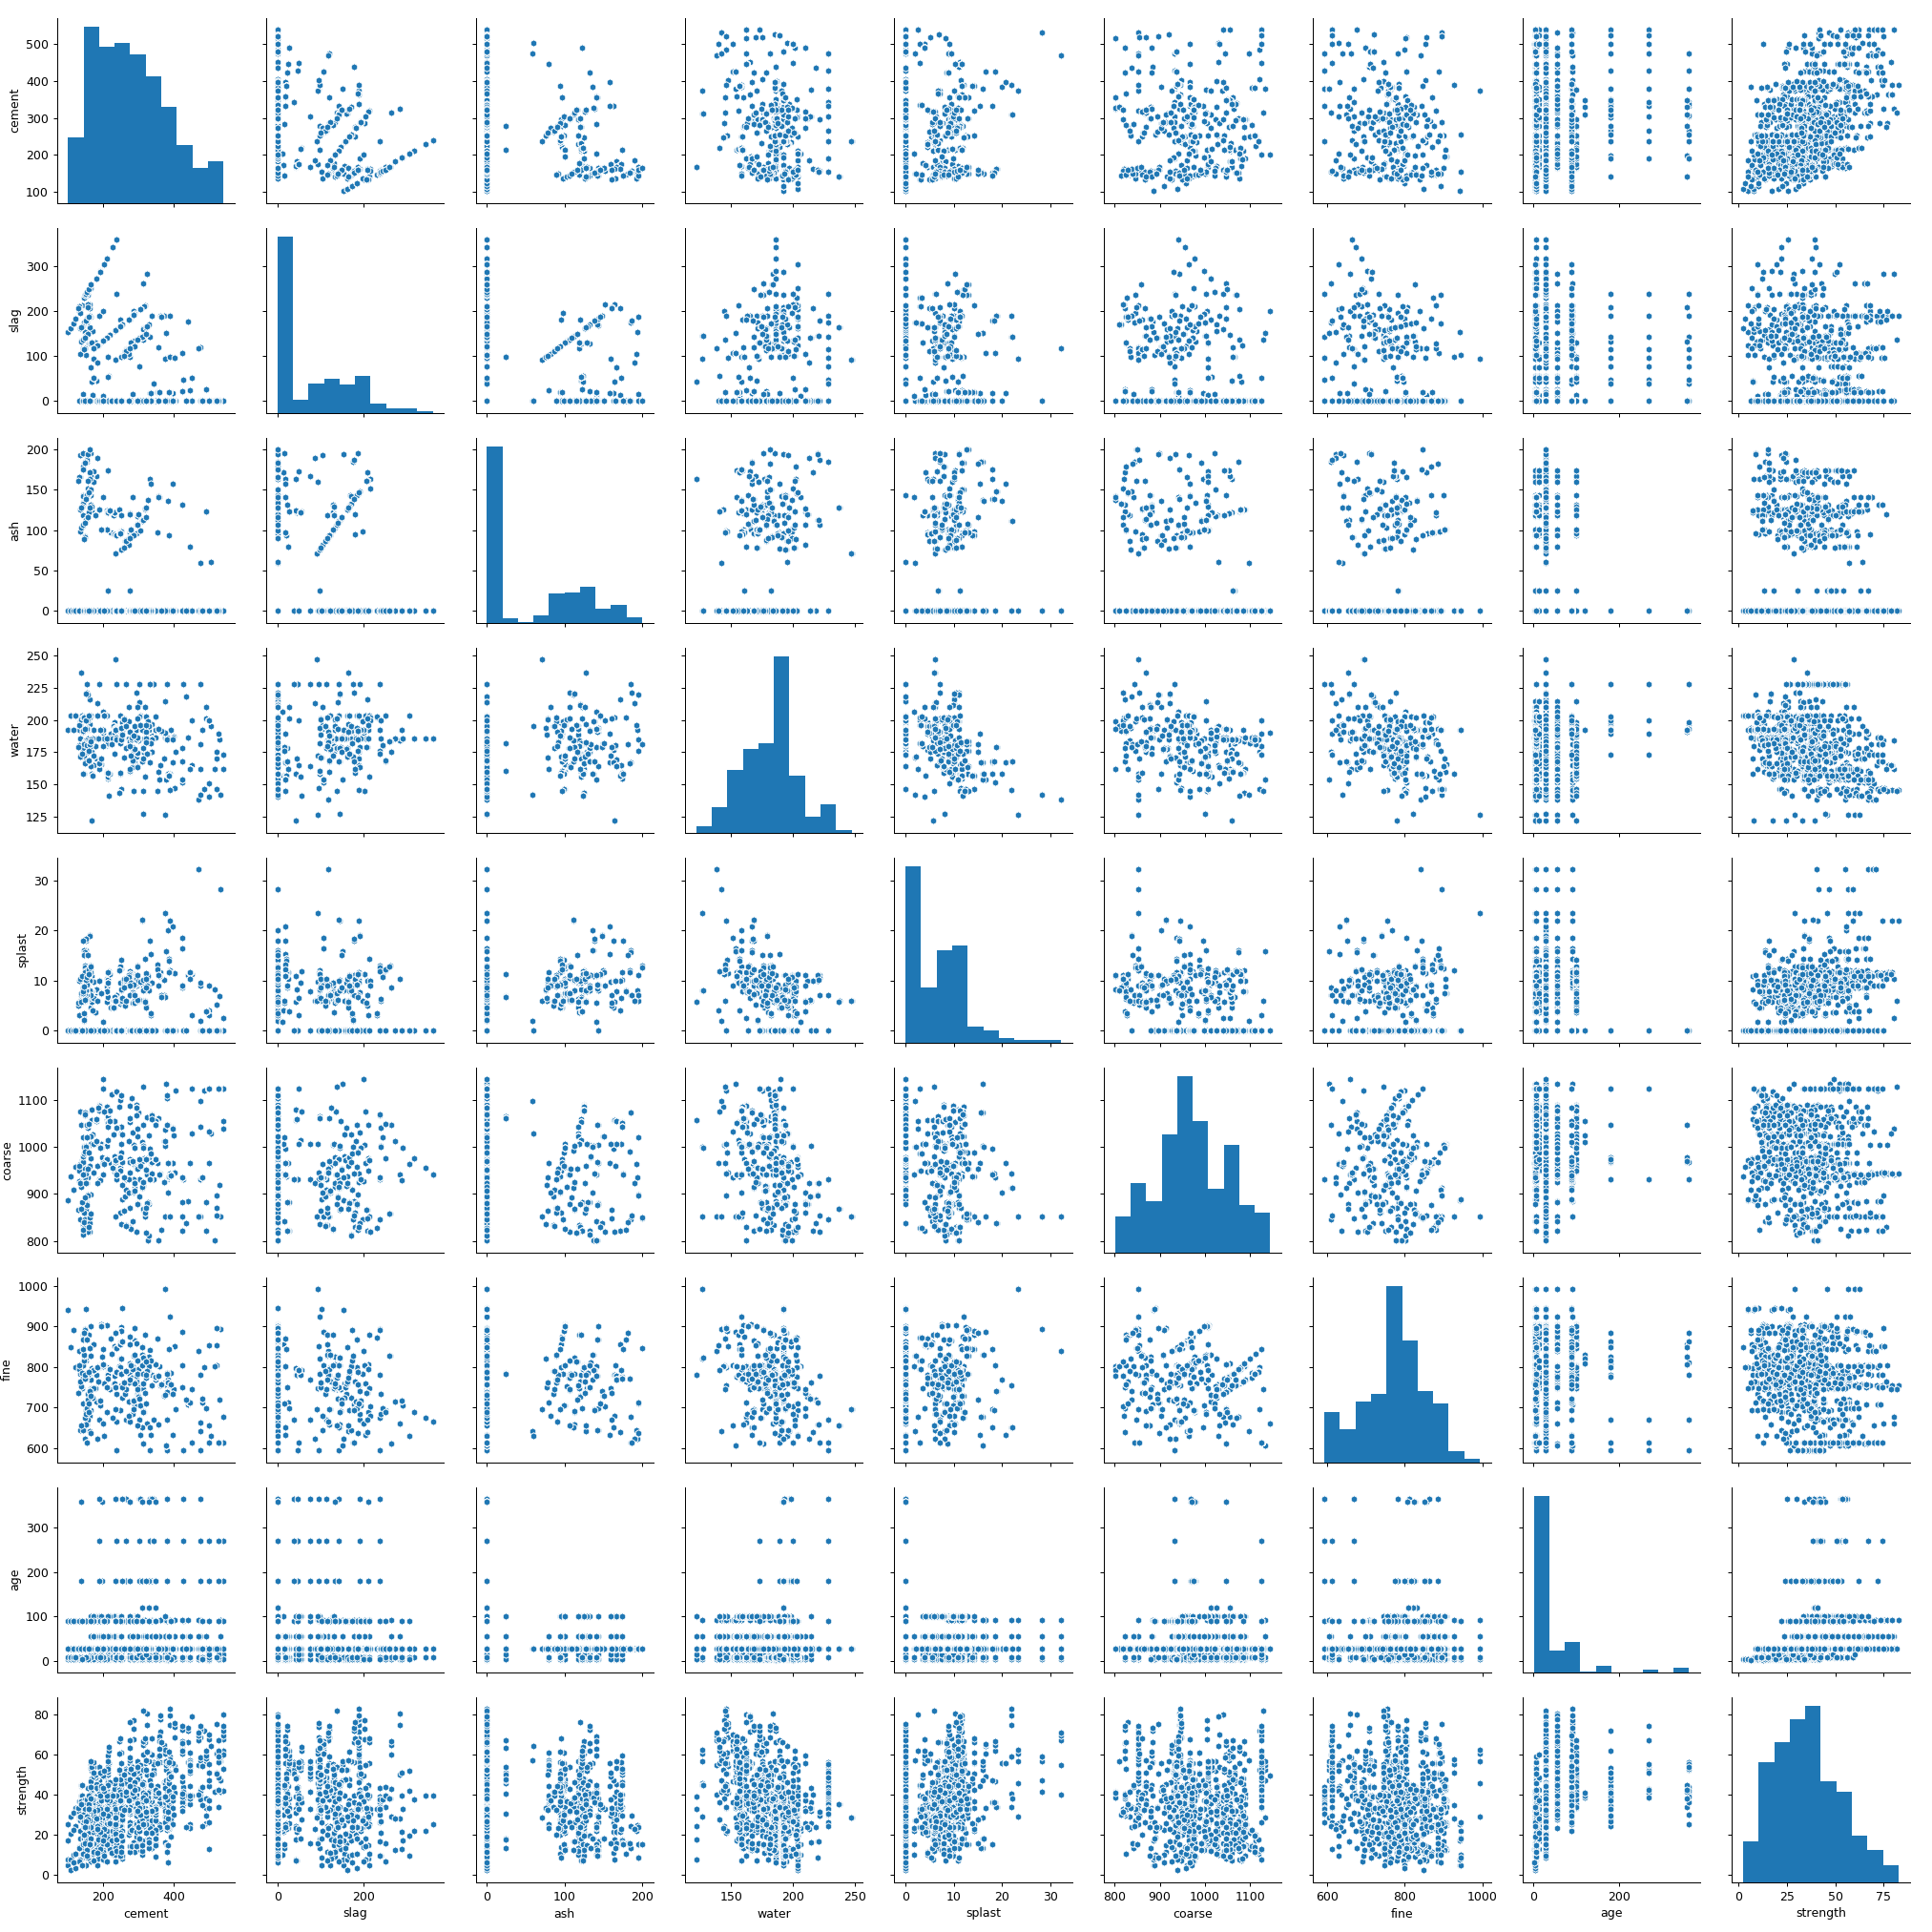

In [15]:
sns.pairplot(dataSet,markers="h")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# split datasets into trainingsets and testsets
train,test = train_test_split(dataSet,test_size =0.3,random_state = 123) 
train_X = train[[x for x in train.columns if x not in ["strength"] ]]
train_Y = train["strength"]
test_X  = test[[x for x in test.columns if x not in ["strength"] ]]
test_Y  = test["strength"]
type(train_X)

pandas.core.frame.DataFrame

In [23]:
from sklearn.metrics import mean_squared_error # for model evaluation
from sklearn.cross_validation import cross_val_score # for validation

target = "strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    print ("*****************************Without Crossvalidation**********************************************")
    algorithm.fit(dtrainx, dtrainy) # train model
    prediction = algorithm.predict(dtestx) # predict Y with trained model, returned Datatype: <class 'numpy.ndarray'>
    print (type(dtesty))#<class 'pandas.core.series.Series'>
    #ax = prediction
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    
    print ("***************************************************************************")
    prediction = pd.DataFrame(prediction) # <class 'numpy.ndarray'> to DataFrame
    
    # Scoring Parameter: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=20,scoring="neg_mean_squared_error")# mean_squared_error
    print ("cross_val Type 1", cross_val.shape, cross_val)
    cross_val = cross_val.ravel()
    # print ("cross_val Type 2", cross_val.shape, cross_val)
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean())
    print ("cv-std  :",cross_val.std())
    print ("cv-max  :",cross_val.max())
    print ("cv-min  :",cross_val.min())
    
    #---------------------------Plotting is only additional information ---------------------------
    plt.figure(figsize=(13,28))
    plt.subplot(211)
    # print (dtesty)
    # print (dtesty.reset_index())
    testy = dtesty.reset_index()["strength"] # reset index of testy since the older indexs are not in order
    # print (testy)
    print (prediction[0]) # prediction output from algorithm
    ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
    ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)
    plt.legend(loc="best") # the location of the legend.
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    ax.set_facecolor("k")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
*****************************Without Crossvalidation**********************************************
<class 'pandas.core.series.Series'>
ROOT MEAN SQUARED ERROR : 10.259026562177118
***************************************************************************
cross_val Type 1 (20,) [-109.89380718 -111.4218817   -92.96263111 -144.16220998 -108.65934754
 -120.32172378 -104.06461439 -112.43769288 -105.85160801 -102.49658599
 -166.69393042 -126.18585552  -92.57246077  -92.31812047 -121.89163493
 -137.60486098  -92.36955507 -130.10281324  -67.52295962 -125.76094702]
CROSS VALIDATION SCORE
************************
cv-mean : -113.26476202982501
cv-std  : 21.485876840663618
cv-max  : -67.5229596210266
cv-min  : -166.69393042000289


<IPython.core.display.Javascript object>


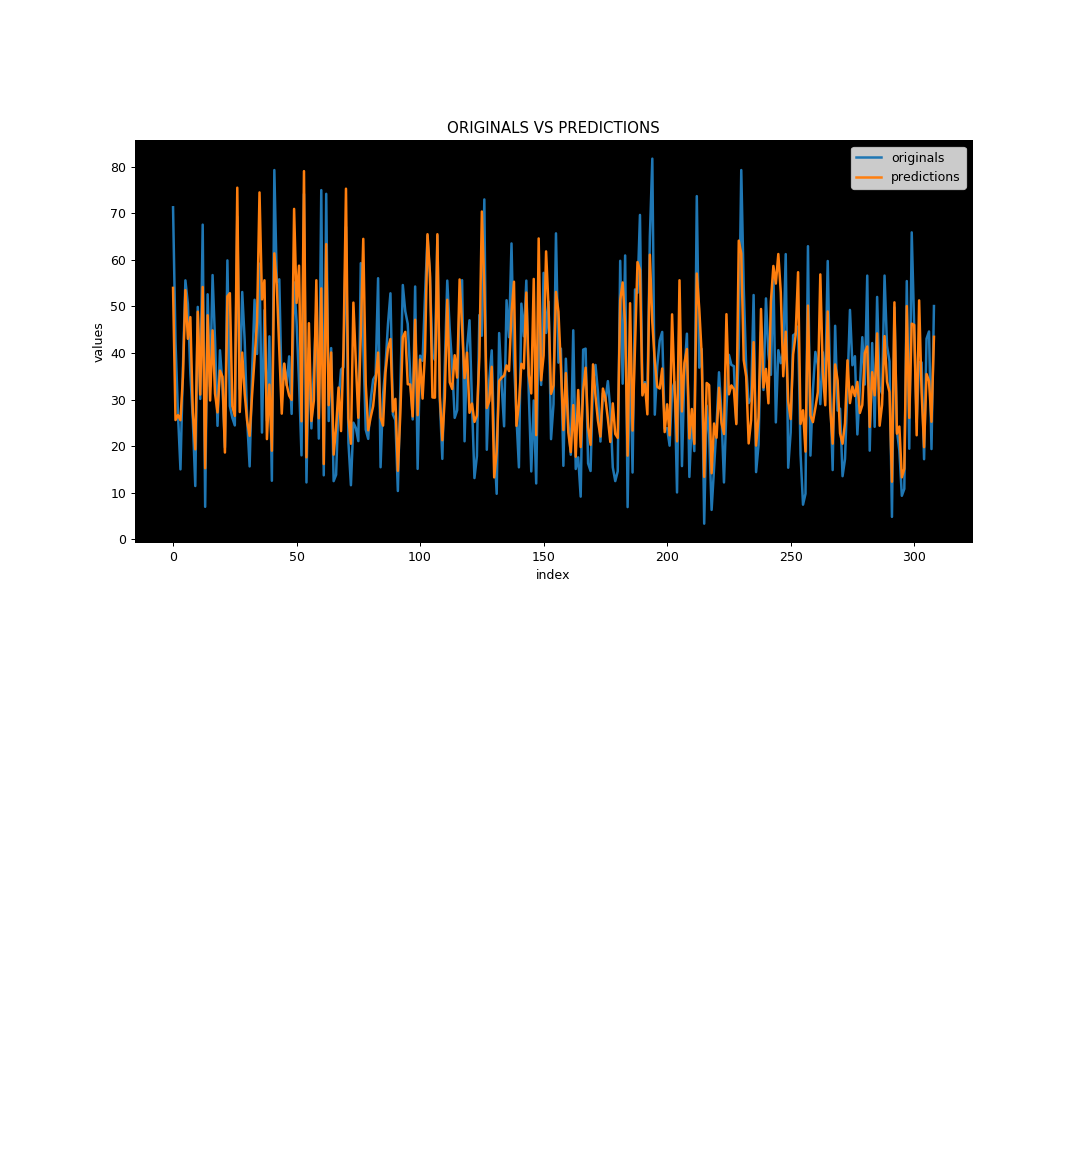

0      53.979283
1      25.587737
2      26.639279
3      25.552442
4      34.857015
5      53.494621
6      43.040584
7      47.708150
8      27.225514
9      19.291622
10     48.867486
11     31.061593
12     54.173698
13     15.231846
14     48.099711
15     29.786296
16     44.856099
17     31.251135
18     27.234692
19     36.199308
20     34.904861
21     18.606318
22     52.164784
23     52.850227
24     28.547870
25     26.480679
26     75.510959
27     27.310981
28     40.082684
29     31.262265
         ...    
279    28.819437
280    39.983891
281    41.383972
282    24.109268
283    35.871655
284    30.888582
285    44.204635
286    24.364653
287    28.864225
288    43.622314
289    33.805162
290    31.611571
291    12.334472
292    50.874624
293    22.662659
294    24.188170
295    13.275819
296    15.124133
297    50.077821
298    26.038286
299    46.292633
300    46.025800
301    22.312388
302    51.292249
303    31.523749
304    19.762665
305    35.468448
306    34.0006

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print ("Mean Vector: --------",mean_vector, mean_vector.shape)
print (all_samples[:,1])
print (all_samples[:,1].reshape(3,1)- mean_vector)
print ("dot product with")
print ((all_samples[:,1].reshape(3,1)- mean_vector).T)
print ("==")
print ((all_samples[:,1].reshape(3,1)- mean_vector).dot((all_samples[:,1].reshape(3,1)- mean_vector).T))
